## IMPORTING LIBRARIES AND GETTING IN THE DATA AND SETTING UP ENVIRONMENT VARIABLES

In [1]:
import gym
import gym_anytrading

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

2024-01-05 11:56:49.709921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
ticker = 'SBIN.NS'
start_date = '2017-11-01'
end_date = '2023-11-01'

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,296.104660,307.636873,296.104660,306.105621,34907283
2017-11-02,306.249217,309.263852,300.076370,300.842010,23110527
2017-11-03,301.894720,313.426904,299.167182,311.034332,26898400
2017-11-06,309.694508,315.819486,307.636902,314.862457,17143407
2017-11-07,314.814575,317.446403,301.942528,303.569489,21883541
...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-01,296.104660,307.636873,296.104660,306.105621,34907283
2017-11-02,306.249217,309.263852,300.076370,300.842010,23110527
2017-11-03,301.894720,313.426904,299.167182,311.034332,26898400
2017-11-06,309.694508,315.819486,307.636902,314.862457,17143407
2017-11-07,314.814575,317.446403,301.942528,303.569489,21883541
...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296


In [6]:
env = gym.make('stocks-v0', df= df, frame_bound = (5,100), window_size = 5)

In [7]:
env.signal_features

array([[ 3.06105621e+02,  0.00000000e+00],
       [ 3.00842010e+02, -5.26361084e+00],
       [ 3.11034332e+02,  1.01923218e+01],
       [ 3.14862457e+02,  3.82812500e+00],
       [ 3.03569489e+02, -1.12929688e+01],
       [ 2.96248230e+02, -7.32125854e+00],
       [ 3.00219940e+02,  3.97171021e+00],
       [ 3.19216919e+02,  1.89969788e+01],
       [ 3.16824341e+02, -2.39257812e+00],
       [ 3.14958130e+02, -1.86621094e+00],
       [ 3.10986481e+02, -3.97164917e+00],
       [ 3.19073364e+02,  8.08688354e+00],
       [ 3.22997162e+02,  3.92379761e+00],
       [ 3.18690582e+02, -4.30657959e+00],
       [ 3.16441559e+02, -2.24902344e+00],
       [ 3.20891724e+02,  4.45016479e+00],
       [ 3.20556763e+02, -3.34960938e-01],
       [ 3.18116333e+02, -2.44042969e+00],
       [ 3.21226685e+02,  3.11035156e+00],
       [ 3.17733551e+02, -3.49313354e+00],
       [ 3.14766724e+02, -2.96682739e+00],
       [ 3.06584167e+02, -8.18255615e+00],
       [ 2.99310730e+02, -7.27343750e+00],
       [ 3.

## ADDING CUSTOM INDICATORS 

In [8]:
from gym_anytrading.envs import StocksEnv
from finta import TA

In [9]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [10]:
df

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2017-11-01,296.104660,307.636873,296.104660,306.105621,34907283,0.000000,0.000000,0.000000e+00
2017-11-02,306.249217,309.263852,300.076370,300.842010,23110527,0.000000,0.000000,-2.311053e+07
2017-11-03,301.894720,313.426904,299.167182,311.034332,26898400,0.000000,67.588518,3.787873e+06
2017-11-06,309.694508,315.819486,307.636902,314.862457,17143407,0.000000,74.546938,2.093128e+07
2017-11-07,314.814575,317.446403,301.942528,303.569489,21883541,0.000000,44.319005,-9.522610e+05
...,...,...,...,...,...,...,...,...
2023-10-25,558.599976,560.799988,553.599976,556.200012,12134624,574.625005,32.936665,4.606426e+09
2023-10-26,551.450012,552.900024,543.200012,547.000000,19424825,571.450007,28.976325,4.587001e+09
2023-10-27,550.000000,562.500000,550.000000,561.150024,10415296,568.908340,40.772240,4.597417e+09


In [11]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end]
    return prices, signal_features

In [12]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df = df, window_size = 12, frame_bound = (12,100))

In [13]:
env2.prices

array([296.1046602 , 300.07636993, 299.16718205, 307.63690193,
       301.9425282 , 293.47285252, 294.95628189, 296.20038983,
       315.58021519, 313.42687822, 308.4024916 , 309.74233439,
       321.56161892, 317.01578192, 315.81949597, 312.9483968 ,
       317.39855058, 317.25501302, 313.95326044, 316.96793969,
       313.13979242, 304.81365844, 297.87518691, 297.77947454,
       295.53046482, 298.11444903, 299.02364796, 298.68866222,
       301.55977326, 301.12908144, 297.77946088, 296.20035971,
       298.11444282, 287.49141099, 304.71793542, 302.89956925,
       301.84682995, 302.8995695 , 302.70818719, 299.5978264 ,
       294.42987252, 295.76971067, 293.13786298, 288.40058454,
       289.16621934, 290.12326789, 292.46798894, 291.89375152,
       290.26681765, 287.10863943, 287.10860602, 287.6350022 ,
       288.59202605, 282.61056152, 280.02658803, 287.58710436,
       289.50117699, 290.98458304, 293.18575951, 302.61250877,
       298.44938642, 297.63592227, 297.63594333, 294.62

In [14]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2017-11-01,296.104660,307.636873,296.104660,306.105621,34907283,0.0,0.000000,0.0
2017-11-02,306.249217,309.263852,300.076370,300.842010,23110527,0.0,0.000000,-23110527.0
2017-11-03,301.894720,313.426904,299.167182,311.034332,26898400,0.0,67.588518,3787873.0
2017-11-06,309.694508,315.819486,307.636902,314.862457,17143407,0.0,74.546938,20931280.0
2017-11-07,314.814575,317.446403,301.942528,303.569489,21883541,0.0,44.319005,-952261.0


## BUILDING ENVIRONMENT AND TRAINING THE AGENT 

In [15]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [16]:
model = A2C('MlpPolicy', env, verbose = 1)
model.learn(total_timesteps = 100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 775      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.153   |
|    explained_variance | 0.0709   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -12.4    |
|    value_loss         | 73.2     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 756      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.0775  |
|    explained_variance | -0.0302  |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -8.2     |
|    value_loss      

------------------------------------
| time/                 |          |
|    fps                | 904      |
|    iterations         | 1700     |
|    time_elapsed       | 9        |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.178   |
|    explained_variance | -40.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | -0.0045  |
|    value_loss         | 0.00427  |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 913      |
|    iterations         | 1800     |
|    time_elapsed       | 9        |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | -888     |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | -0.0253  |
|    value_loss         | 0.233    |
-

------------------------------------
| time/                 |          |
|    fps                | 960      |
|    iterations         | 3300     |
|    time_elapsed       | 17       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.171   |
|    explained_variance | -341     |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | -0.0253  |
|    value_loss         | 0.159    |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 964       |
|    iterations         | 3400      |
|    time_elapsed       | 17        |
|    total_timesteps    | 17000     |
| train/                |           |
|    entropy_loss       | -0.0195   |
|    explained_variance | 0.943     |
|    learning_rate      | 0.0007    |
|    n_updates          | 3399      |
|    policy_loss        | -0.000151 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 999      |
|    iterations         | 4900     |
|    time_elapsed       | 24       |
|    total_timesteps    | 24500    |
| train/                |          |
|    entropy_loss       | -0.149   |
|    explained_variance | 0.854    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4899     |
|    policy_loss        | 0.0228   |
|    value_loss         | 7.07     |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 999      |
|    iterations         | 5000     |
|    time_elapsed       | 25       |
|    total_timesteps    | 25000    |
| train/                |          |
|    entropy_loss       | -0.0167  |
|    explained_variance | 0.999    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4999     |
|    policy_loss        | 0.000183 |
|    value_loss         | 0.0139   |
-

------------------------------------
| time/                 |          |
|    fps                | 1019     |
|    iterations         | 6500     |
|    time_elapsed       | 31       |
|    total_timesteps    | 32500    |
| train/                |          |
|    entropy_loss       | -0.0165  |
|    explained_variance | -26.3    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6499     |
|    policy_loss        | 0.00141  |
|    value_loss         | 0.96     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1021      |
|    iterations         | 6600      |
|    time_elapsed       | 32        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.00111  |
|    explained_variance | 0.76      |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -1.51e-05 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1036      |
|    iterations         | 8100      |
|    time_elapsed       | 39        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -4.82e-06 |
|    explained_variance | -190      |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | 3.22e-07  |
|    value_loss         | 8.32      |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1037     |
|    iterations         | 8200     |
|    time_elapsed       | 39       |
|    total_timesteps    | 41000    |
| train/                |          |
|    entropy_loss       | -0.023   |
|    explained_variance | 0.977    |
|    learning_rate      | 0.0007   |
|    n_updates          | 8199     |
|    policy_loss        | 0.00143  |
|    value_loss         

-------------------------------------
| time/                 |           |
|    fps                | 1049      |
|    iterations         | 9700      |
|    time_elapsed       | 46        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.0233   |
|    explained_variance | 0.996     |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | -0.000641 |
|    value_loss         | 0.0137    |
-------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1050     |
|    iterations         | 9800     |
|    time_elapsed       | 46       |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.0193  |
|    explained_variance | 0.935    |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 0.000387 |
|    value_loss         

------------------------------------
| time/                 |          |
|    fps                | 1053     |
|    iterations         | 11300    |
|    time_elapsed       | 53       |
|    total_timesteps    | 56500    |
| train/                |          |
|    entropy_loss       | -0.0108  |
|    explained_variance | 0.866    |
|    learning_rate      | 0.0007   |
|    n_updates          | 11299    |
|    policy_loss        | 2.58e-05 |
|    value_loss         | 0.0731   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1054      |
|    iterations         | 11400     |
|    time_elapsed       | 54        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.00328  |
|    explained_variance | 0.999     |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -5.87e-05 |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1063      |
|    iterations         | 12900     |
|    time_elapsed       | 60        |
|    total_timesteps    | 64500     |
| train/                |           |
|    entropy_loss       | -0.000186 |
|    explained_variance | 0.979     |
|    learning_rate      | 0.0007    |
|    n_updates          | 12899     |
|    policy_loss        | 1.28e-06  |
|    value_loss         | 0.00987   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1063      |
|    iterations         | 13000     |
|    time_elapsed       | 61        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.000429 |
|    explained_variance | 0.996     |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | 7.49e-06  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1070      |
|    iterations         | 14500     |
|    time_elapsed       | 67        |
|    total_timesteps    | 72500     |
| train/                |           |
|    entropy_loss       | -0.0102   |
|    explained_variance | 0.999     |
|    learning_rate      | 0.0007    |
|    n_updates          | 14499     |
|    policy_loss        | -0.000223 |
|    value_loss         | 0.0628    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1070      |
|    iterations         | 14600     |
|    time_elapsed       | 68        |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.00317  |
|    explained_variance | 1         |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | -4.47e-05 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 1075      |
|    iterations         | 16100     |
|    time_elapsed       | 74        |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -0.000453 |
|    explained_variance | 0.991     |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | -1.13e-05 |
|    value_loss         | 0.0406    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1076      |
|    iterations         | 16200     |
|    time_elapsed       | 75        |
|    total_timesteps    | 81000     |
| train/                |           |
|    entropy_loss       | -9.86e-08 |
|    explained_variance | -1.55e+03 |
|    learning_rate      | 0.0007    |
|    n_updates          | 16199     |
|    policy_loss        | -0        |
|    value_l

------------------------------------
| time/                 |          |
|    fps                | 1077     |
|    iterations         | 17700    |
|    time_elapsed       | 82       |
|    total_timesteps    | 88500    |
| train/                |          |
|    entropy_loss       | -0.00108 |
|    explained_variance | 0.95     |
|    learning_rate      | 0.0007   |
|    n_updates          | 17699    |
|    policy_loss        | 7.37e-06 |
|    value_loss         | 0.0231   |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1078      |
|    iterations         | 17800     |
|    time_elapsed       | 82        |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -8.67e-08 |
|    explained_variance | -1.08e+05 |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | -0        |
|    value_loss         | 

-------------------------------------
| time/                 |           |
|    fps                | 1078      |
|    iterations         | 19300     |
|    time_elapsed       | 89        |
|    total_timesteps    | 96500     |
| train/                |           |
|    entropy_loss       | -0.000536 |
|    explained_variance | 0.823     |
|    learning_rate      | 0.0007    |
|    n_updates          | 19299     |
|    policy_loss        | -2.6e-06  |
|    value_loss         | 0.0265    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 1078      |
|    iterations         | 19400     |
|    time_elapsed       | 89        |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -1.23e-08 |
|    explained_variance | -23.1     |
|    learning_rate      | 0.0007    |
|    n_updates          | 19399     |
|    policy_loss        | -0        |
|    value_l

## USING TRAINED MODEL FOR PREDICTION AND PROFIT CALCULATION 

In [17]:
env = MyCustomEnv(df=df, frame_bound = (90,200), window_size = 12)
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs,rewards, done, info = env.step(action)
    if done:
        print('info: ',info)
        break
        

info:  {'total_reward': 45.98528192629402, 'total_profit': 1.15115293955053, 'position': 1}


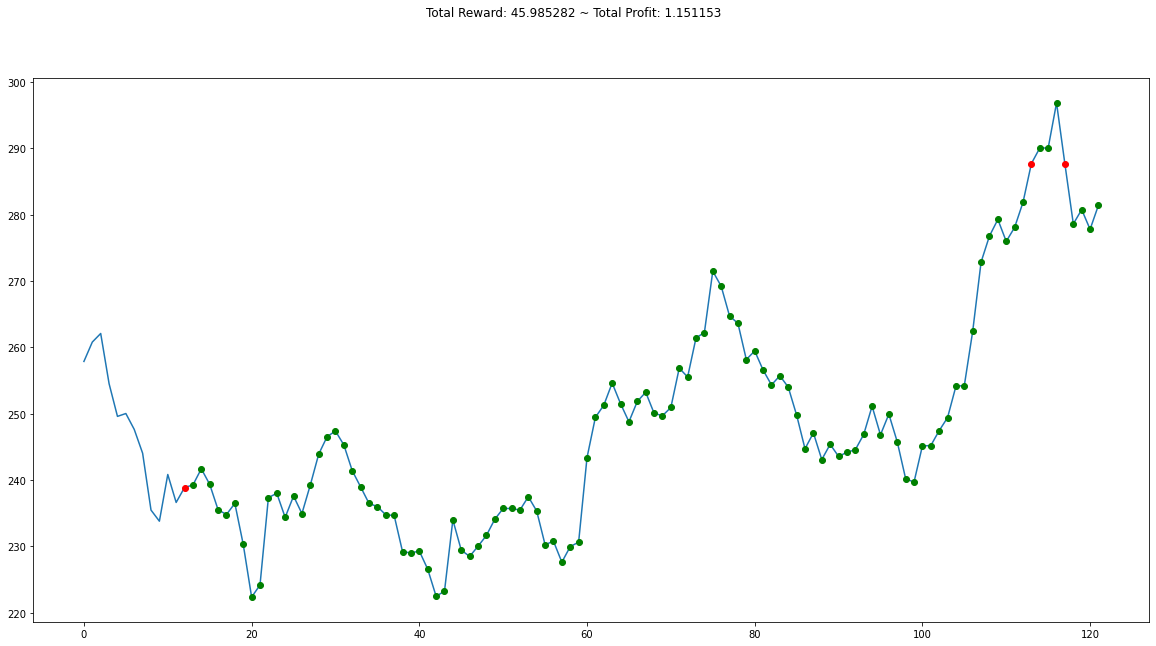

In [18]:
plt.figure(figsize=(20,10))
plt.cla()
env.render_all()
plt.show()